## Principal Component Analysis (PCA)

It is mainly used for dimensionality reduction.

N D -- N-1 D

3D - 2D

like that

let's explain Principal Component Analysis (PCA) mathematically. PCA involves linear algebra, so we'll go through the key mathematical steps:

**Step 1: Standardize the Data**

Let's assume we have a dataset with `m` data points and `n` features, which can be represented as an `m x n` matrix, often denoted as X.

Standardizing the data means subtracting the mean (μ) from each feature and dividing by the standard deviation (σ) to make all the features have a mean of 0 and a standard deviation of 1. This can be represented as:

```
X_standardized = (X - μ) / σ
```

**Step 2: Compute the Covariance Matrix**

The covariance matrix represents how each feature varies with every other feature. It is an `n x n` matrix and is calculated as follows:

```
C = (1/m) * (X_standardized^T * X_standardized)
```

Where `^T` denotes the transpose of the matrix. This covariance matrix C represents the relationships between the features in the standardized dataset.

**Step 3: Calculate Eigenvectors and Eigenvalues**

The next step is to find the eigenvectors and eigenvalues of the covariance matrix C. The eigenvectors represent the directions in which the data varies the most, and the eigenvalues represent the amount of variance explained by each eigenvector.

The eigenvectors (V) and eigenvalues (λ) can be obtained by solving the following equation:

```
C * V = λ * V
```

Where V is a matrix of eigenvectors, and λ is a vector of eigenvalues.

**Step 4: Sort Eigenvectors**

Sort the eigenvectors in descending order based on their corresponding eigenvalues. The eigenvector with the highest eigenvalue corresponds to the first principal component, the one with the second-highest eigenvalue corresponds to the second principal component, and so on.

**Step 5: Choose the Number of Principal Components**

You need to decide how many principal components to keep. This decision can be based on the cumulative explained variance. If you want to reduce the dimensionality, you might choose a lower number of components that still capture a high percentage of the variance.

**Step 6: Project the Data**

Finally, you project the original data onto the new coordinate system defined by the selected principal components. This is done by multiplying the standardized data by the matrix of selected eigenvectors.

```
X_pca = X_standardized * V_selected
```

Where V_selected contains the first `k` eigenvectors (where `k` is the number of principal components you choose).

This projected data `X_pca` is the transformed dataset in the new feature space represented by the principal components.

In summary, PCA is a mathematical technique that involves finding the covariance matrix, computing its eigenvectors and eigenvalues, selecting a subset of principal components, and projecting the data onto these components. This allows you to reduce the dimensionality of the data while retaining as much information as possible.

## PCA perform on Simple Data

In [33]:
import numpy as np
from sklearn.decomposition import PCA

# Generate some sample data (replace this with your real-time data)
data = np.random.rand(100, 8)  # 100 data points with 4 features

# Step 1: Standardize or normalize the data
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
normalized_data = (data - mean) / std

# Step 2: Perform PCA
n_components = 2  # You can choose the number of components you want to retain
pca = PCA(n_components=n_components)
principal_components_data = pca.fit_transform(normalized_data)

# The `principal_components` now contains the reduced-dimensional data
print("Original data shape:", normalized_data.shape)
print("Reduced data shape:", principal_components_data.shape)

# The explained variance ratio provides information about the variance retained by each principal component.
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratio)

# You can also access the principal components themselves if needed
principal_components_matrix = pca.components_
print("Principal Components Matrix:", principal_components_matrix)


Original data shape: (100, 8)
Reduced data shape: (100, 2)
Explained Variance Ratios: [0.17178869 0.16017285]
Principal Components Matrix: [[-0.00941695  0.44750337 -0.07573093 -0.61866577 -0.24387618 -0.14159141
   0.09097716  0.56865542]
 [ 0.50062902  0.01443196 -0.60890234 -0.0935306   0.25660251  0.48798734
   0.25623076  0.00464611]]


## PCA perform on Cancer Dataset

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [35]:
# Load the dataset

from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

In [36]:
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [37]:
# Create a DataFrame using the data and feature names
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

# Optionally, you can add the target variable (diagnosis) to the DataFrame if needed
df['diagnosis'] = cancer_data.target


In [38]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [39]:
# Feature Extraction PCA

# Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.75062224,
         1.93701461, -1.29767572],
       [ 1.82982061, -0.35363241,  1.68595471, ..., -0.24388967,
         0.28118999, -1.29767572],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.152255  ,
         0.20139121, -1.29767572],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ..., -1.10454895,
        -0.31840916, -1.29767572],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  1.91908301,
         2.21963528, -1.29767572],
       [-1.80840125,  1.22179204, -1.81438851, ..., -0.04813821,
        -0.75120669,  0.77060855]])

In [40]:
# Applying PCA

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [41]:
data_pca = pca.fit_transform(scaled_data)

In [42]:
data_pca

array([[ 9.22577011,  2.11619563],
       [ 2.6558016 , -3.78477586],
       [ 5.89249212, -1.00557896],
       ...,
       [ 1.53007727, -1.95887147],
       [10.40500789,  1.84907792],
       [-5.50486158, -0.76634841]])

In [43]:
pca.explained_variance_ratio_

array([0.44896035, 0.18472104])

Text(0, 0.5, 'Second PCA')

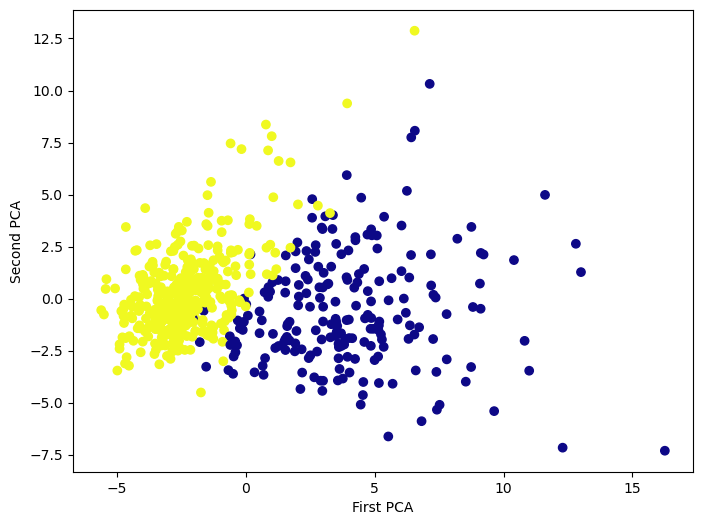

In [44]:
# Plot the figure

plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0],data_pca[:,1],c = cancer_data.target,cmap = 'plasma')
plt.xlabel('First PCA')
plt.ylabel('Second PCA')

#### NOTE:
   The PCA explained varience refers to the how much of data is captured on PCA line.